## In this notebook test code from BP_utils.py for taking numpy arrays of images and masks and creating combined ultrasound image, mask, and an dummy classifier decision bounday

## these arrays were generated using code from:
https://github.com/jocicmarko/ultrasound-nerve-segmentation

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

In [32]:
# load the BP_utils.py script
cwd=os.getcwd()
print os.listdir(cwd)
os.chdir('scripts')
import BP_utils
os.chdir(cwd)

['.ipynb_checkpoints', 'analysis_notebooks', 'commands.bash', 'data', 'documents', 'imgs_id_test.npy', 'imgs_mask_train.npy', 'imgs_test.npy', 'imgs_train.npy', 'mnist_data', 'raw', 'scratch', 'scripts', 'Test_np_data_arr_construction.ipynb']


In [5]:
# load training data
train_imgs= np.load('imgs_train.npy')
print 'shape train_imgs {}'.format(np.shape(train_imgs))
train_masks = np.load('imgs_mask_train.npy')
print 'shape train_mask {}'.format(np.shape(train_masks))

shape train_imgs (5635, 1, 420, 580)
shape train_mask (5635, 1, 420, 580)


In [6]:
print "size of train_imgs is"
print "{} GB".format(sys.getsizeof(train_imgs)/(10.0)**9)

size of train_imgs is
1.372686144 GB


In [7]:
## temporarily shorten the array of training_imgs 
num_imgs=5*10**3
train_imgs=train_imgs[0:num_imgs]
train_masks=train_masks[0:num_imgs]

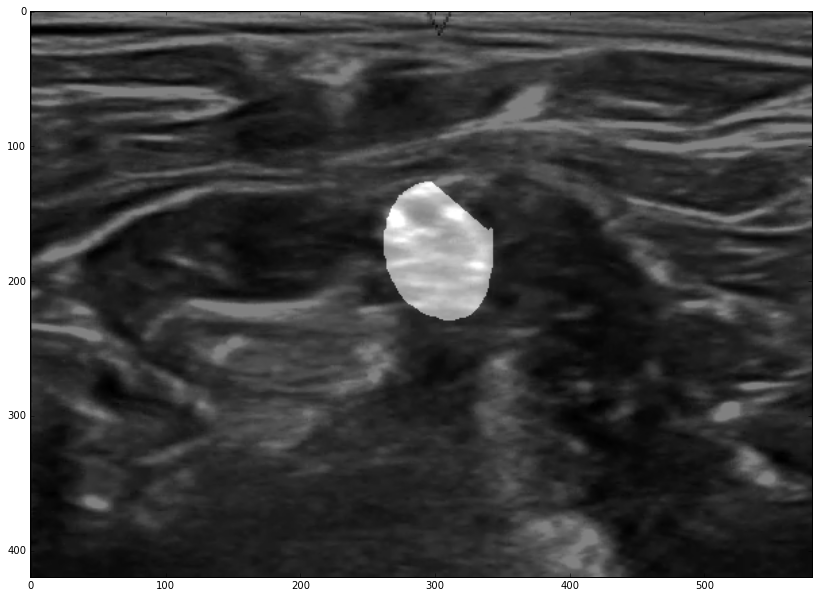

In [31]:
# method 1 overlay the image with a transparent represention of the corresponding mask
# we do this for training example 6
%matplotlib inline
fig_size=(14.,14.)

fig=plt.figure(figsize=(fig_size))
ax= fig.add_subplot('111')
ax.imshow(train_imgs[6,0], cmap='gray')
ax.imshow(train_masks[6,0], cmap='gray',alpha=0.5)

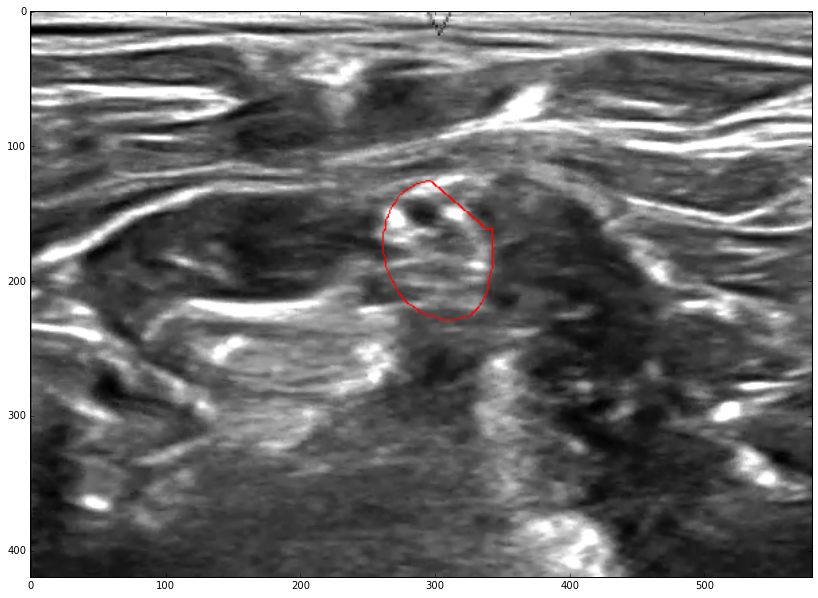

In [30]:
%matplotlib inline
## method 2 plot the image and the bounday of the maske using the 
## function BP_utils.plot_mask_with_decision_bndry
## to add the training image 6 and the outline of training mask 6 to
## to the axis object ax

fig=plt.figure(figsize=(14.,14.))
ax=fig.add_subplot('111')
ax=BP_utils.plot_mask_with_decision_bndry(ax, train_imgs[6,0],train_masks[6,0])


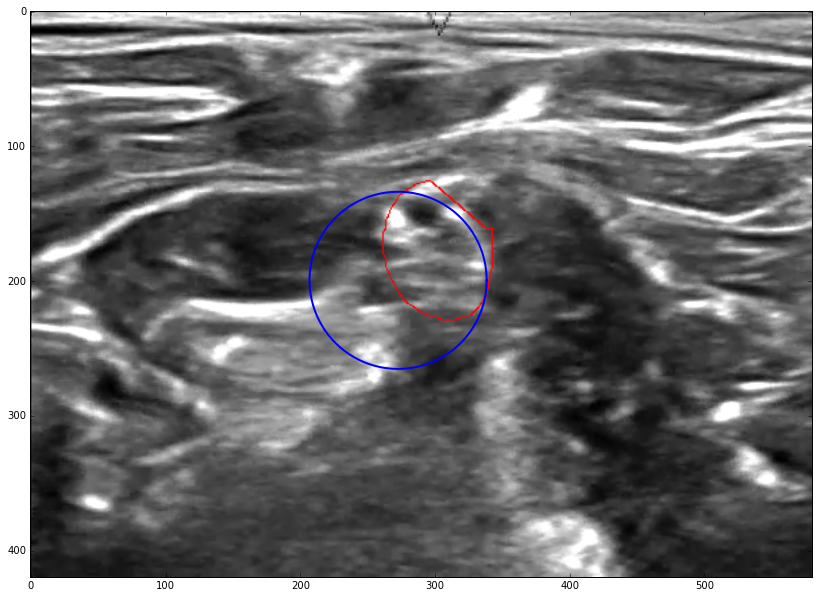

In [36]:
## method 3 plot image mask boundary and dummy decision boundary
## the decision boundary is a tuple of arrays of xvals and yvals
## this is the assumed output of the cl assifier.
fig= BP_utils.plot_example(train_imgs[6,0],train_masks[6,0])